In [0]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
pd.set_option('display.max_columns', 500)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
os.chdir("/content")

data_ori = pd.read_csv('ReturnsPrediction.csv')
print(data_ori.shape)
# types
print(data_ori.dtypes)
# feature names
print(list(data_ori))
# head
print(data_ori.head(6))
# descriptions, change precision to 2 places
print(data_ori.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(481092, 14)
orderItemID         int64
orderDate          object
deliveryDate       object
itemID              int64
size               object
color              object
manufacturerID      int64
price             float64
customerID          int64
salutation         object
dateOfBirth        object
state              object
creationDate       object
returnShipment      int64
dtype: object
['orderItemID', 'orderDate', 'deliveryDate', 'itemID', 'size', 'color', 'manufacturerID', 'price', 'customerID', 'salutation', 'dateOfBirth', 'state', 'creationDate', 'returnShipment']
   orderItemID   orderDate deliveryDate  itemID size color  manufacturerID  \
0         2217  02-04-2012   06-04-2012      50    1  grey              21   
1         3188  03-04-2012   06-04-2012      30    1  blue              21   
2         5364  06-04-2012   09-04-2012      30    1  blue              21   
3         7554  07-04-2012   13-04-2012      30    1  blue              21   
4         8429  07-04-2012   13-04

# FEATURE ENGINEERING FOR THE DATA SET

In [3]:
data_ori.nunique()  #Checking Unique Value

orderItemID       481092
orderDate            365
deliveryDate         327
itemID              3007
size                 123
color                 87
manufacturerID       165
price                379
customerID         59754
salutation             5
dateOfBirth        14308
state                 16
creationDate         775
returnShipment         2
dtype: int64

In [4]:
 print(data_ori.isnull().sum())  #Checking for null values

orderItemID           0
orderDate             0
deliveryDate      39419
itemID                0
size                  0
color               143
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48889
state                 0
creationDate          0
returnShipment        0
dtype: int64


# create some new columns "deliverytime_days","age_at_order_yrs","product_age_days"

In [0]:
data_ori.head(6)
pd.Timestamp.max #?
data_ori["dateOfBirth"] = pd.to_datetime(data_ori["dateOfBirth"], errors = 'coerce') # overpassing Time max DOB

In [0]:
data_ori["deliveryDate"] = pd.to_datetime(data_ori["deliveryDate"])
data_ori["orderDate"] = pd.to_datetime(data_ori["orderDate"])
data_ori["dateOfBirth"] = pd.to_datetime(data_ori["dateOfBirth"])
data_ori["creationDate"] = pd.to_datetime(data_ori["creationDate"])

# Making columns deliver time in days, age at the order in yrs and product age in days with the below logic
data_ori["deliverytime_days"] = (data_ori["deliveryDate"] - data_ori["orderDate"])/np.timedelta64(1, 'D')
data_ori["age_at_order_yrs"] = (data_ori["orderDate"] - data_ori["dateOfBirth"])/np.timedelta64(1, 'Y')
data_ori["product_age_days"] = (data_ori["orderDate"] - data_ori["creationDate"])/np.timedelta64(1, 'D')

In [7]:
data_ori.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,deliverytime_days,age_at_order_yrs,product_age_days
0,2217,2012-02-04,2012-06-04,50,1,grey,21,59.95,2065,Mrs,1970-04-25,Baden-Wuerttemberg,2012-02-04,0,121.0,41.780461,0.0
1,3188,2012-03-04,2012-06-04,30,1,blue,21,49.95,2462,Mrs,1978-06-30,Bavaria,2012-12-02,0,92.0,33.678994,-273.0
2,5364,2012-06-04,2012-09-04,30,1,blue,21,49.95,3437,Mrs,1971-09-13,North Rhine-Westphalia,2012-06-04,0,92.0,40.726367,0.0
3,7554,2012-07-04,2012-04-13,30,1,blue,21,49.95,1927,Mrs,1975-02-24,Baden-Wuerttemberg,2011-02-16,1,-82.0,37.358741,504.0
4,8429,2012-07-04,2012-04-13,30,1,red,21,49.95,4702,Mrs,1949-11-19,Brandenburg,2011-07-08,1,-82.0,62.624147,362.0


In [8]:
#Removing missing value
data_ori.dropna(subset = ['deliveryDate'])
data_ori.dropna(subset = ['dateOfBirth'])
data_ori['day_of_week'] = data_ori['orderDate'].dt.day_name() #Converting order date into day 
data_ori.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,deliverytime_days,age_at_order_yrs,product_age_days,day_of_week
0,2217,2012-02-04,2012-06-04,50,1,grey,21,59.95,2065,Mrs,1970-04-25,Baden-Wuerttemberg,2012-02-04,0,121.0,41.780461,0.0,Saturday
1,3188,2012-03-04,2012-06-04,30,1,blue,21,49.95,2462,Mrs,1978-06-30,Bavaria,2012-12-02,0,92.0,33.678994,-273.0,Sunday
2,5364,2012-06-04,2012-09-04,30,1,blue,21,49.95,3437,Mrs,1971-09-13,North Rhine-Westphalia,2012-06-04,0,92.0,40.726367,0.0,Monday
3,7554,2012-07-04,2012-04-13,30,1,blue,21,49.95,1927,Mrs,1975-02-24,Baden-Wuerttemberg,2011-02-16,1,-82.0,37.358741,504.0,Wednesday
4,8429,2012-07-04,2012-04-13,30,1,red,21,49.95,4702,Mrs,1949-11-19,Brandenburg,2011-07-08,1,-82.0,62.624147,362.0,Wednesday


In [0]:
# Droping the Date columns
data_ori = data_ori.drop("orderDate", 1)
data_ori = data_ori.drop("deliveryDate", 1)
data_ori = data_ori.drop("dateOfBirth", 1)
data_ori = data_ori.drop("creationDate", 1)


In [10]:
data_ori.head()

,orderItemID,itemID,size,color,manufacturerID,price,customerID,salutation,state,returnShipment,deliverytime_days,age_at_order_yrs,product_age_days,day_of_week
0,2217,50,1,grey,21,59.95,2065,Mrs,Baden-Wuerttemberg,0,121.0,41.780461,0.0,Saturday
1,3188,30,1,blue,21,49.95,2462,Mrs,Bavaria,0,92.0,33.678994,-273.0,Sunday
2,5364,30,1,blue,21,49.95,3437,Mrs,North Rhine-Westphalia,0,92.0,40.726367,0.0,Monday
3,7554,30,1,blue,21,49.95,1927,Mrs,Baden-Wuerttemberg,1,-82.0,37.358741,504.0,Wednesday
4,8429,30,1,red,21,49.95,4702,Mrs,Brandenburg,1,-82.0,62.624147,362.0,Wednesday


In [0]:
# Removing days in negative as they are the outliers
data_ori = data_ori[data_ori['deliverytime_days'] >= 0]
data_ori = data_ori[data_ori["age_at_order_yrs"] >= 0]
data_ori = data_ori[data_ori["product_age_days"] >= 0]

In [12]:
data_ori.describe()

,orderItemID,itemID,manufacturerID,price,customerID,returnShipment,deliverytime_days,age_at_order_yrs,product_age_days
count,295744.000000,295744.000000,295744.000000,295744.000000,295744.000000,295744.000000,295744.000000,295744.000000,295744.000000
mean,246344.383954,1428.424661,30.167888,70.212335,32584.044867,0.530391,38.918227,48.650871,327.538770
std,137102.819310,912.951061,30.269250,45.572394,23526.368197,0.499076,55.161398,11.137618,262.555265
min,1.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.002738,0.000000
25%,134386.750000,394.000000,5.000000,34.900000,12519.000000,0.000000,2.000000,42.574454,39.000000
50%,250507.500000,1589.000000,24.000000,59.900000,27383.000000,1.000000,6.000000,47.831235,337.000000
75%,364685.250000,2337.000000,44.000000,89.900000,49774.000000,1.000000,61.000000,53.402876,540.000000
max,481088.000000,3070.000000,166.000000,999.000000,86609.000000,1.000000,600.000000,113.039967,1034.000000


# Transfer the size value and simplify the color

In [0]:
# converting size values
data_ori["size"]= data_ori["size"].replace("S",33)
data_ori["size"]= data_ori["size"].replace("M",37)
data_ori["size"]= data_ori["size"].replace("L",41)
data_ori["size"]= data_ori["size"].replace("XL",45)
data_ori["size"]= data_ori["size"].replace("XXL",49)
data_ori["size"]= data_ori["size"].replace("XXXL",51)
data_ori["size"]= data_ori["size"].replace("xxxl",51)
data_ori["size"]= data_ori["size"].replace("s",33)
data_ori["size"]= data_ori["size"].replace("m",37)
data_ori["size"]= data_ori["size"].replace("l",41)
data_ori["size"]= data_ori["size"].replace("xl",45)
data_ori["size"]= data_ori["size"].replace("xxl",49)
data_ori["size"]= data_ori["size"].replace("S",33)
data_ori["size"]= data_ori["size"].replace("M",37)
data_ori["size"]= data_ori["size"].replace("L",41)
data_ori["size"]= data_ori["size"].replace("XL",45)
data_ori["size"]= data_ori["size"].replace("XXL",49)
data_ori["size"]= data_ori["size"].replace("XXXL",51)
data_ori["size"]= data_ori["size"].replace("xxxl",51)
data_ori["size"]= data_ori["size"].replace("xs",30)
data_ori["size"]= data_ori["size"].replace("XS",30)

In [0]:
data_ori["size"]= data_ori["size"].replace("10+",10)
data_ori["size"]= data_ori["size"].replace("11+",11)
data_ori["size"]= data_ori["size"].replace("12+",12)
data_ori["size"]= data_ori["size"].replace("2+",2)
data_ori["size"]= data_ori["size"].replace("3+",3)
data_ori["size"]= data_ori["size"].replace("36+",36)
data_ori["size"]= data_ori["size"].replace("37+",37)
data_ori["size"]= data_ori["size"].replace("38+",38)
data_ori["size"]= data_ori["size"].replace("39+",39)
data_ori["size"]= data_ori["size"].replace("40+",40)
data_ori["size"]= data_ori["size"].replace("41+",41)
data_ori["size"]= data_ori["size"].replace("42+",42)
data_ori["size"]= data_ori["size"].replace("43+",43)
data_ori["size"]= data_ori["size"].replace("44+",44)
data_ori["size"]= data_ori["size"].replace("45+",45)
data_ori["size"]= data_ori["size"].replace("46+",46)
data_ori["size"]= data_ori["size"].replace("5+",5)
data_ori["size"]= data_ori["size"].replace("6+",6)
data_ori["size"]= data_ori["size"].replace("7+",7)
data_ori["size"]= data_ori["size"].replace("8+",8)
data_ori["size"]= data_ori["size"].replace("9+",9)
data_ori["size"]= data_ori["size"].replace("4+",4)
data_ori["size"]= data_ori["size"].replace("13+",13)

In [0]:
data_ori = data_ori[data_ori["size"] != "unsized"] # Removing Unsized from size colum

In [0]:
# Creating cluster of colors
data_ori["color"]=data_ori["color"].replace("berry","red")
data_ori["color"]=data_ori["color"].replace("bordeaux","red")
data_ori["color"]=data_ori["color"].replace("dark garnet","red")
data_ori["color"]=data_ori["color"].replace("fuchsia","red")
data_ori["color"]=data_ori["color"].replace("crimson","red")
data_ori["color"]=data_ori["color"].replace("magenta","pink")
data_ori["color"]=data_ori["color"].replace("antique pink","pink")
data_ori["color"]=data_ori["color"].replace("pink","pink")
data_ori["color"]=data_ori["color"].replace("pallid","pink")
data_ori["color"]=data_ori["color"].replace("coral","pink")
data_ori["color"]=data_ori["color"].replace("hibiscus","red")
data_ori["color"]=data_ori["color"].replace("orange","orange")
data_ori["color"]=data_ori["color"].replace("apricot","orange")
data_ori["color"]=data_ori["color"].replace("ocher","yellow")
data_ori["color"]=data_ori["color"].replace("beige","yellow")
data_ori["color"]=data_ori["color"].replace("lemon","yellow")
data_ori["color"]=data_ori["color"].replace("vanille","yellow")
data_ori["color"]=data_ori["color"].replace("creme","yellow")
data_ori["color"]=data_ori["color"].replace("almond","yellow")
data_ori["color"]=data_ori["color"].replace("mango","yellow")
data_ori["color"]=data_ori["color"].replace("curry","yellow")
data_ori["color"]=data_ori["color"].replace("ancient","yellow")
data_ori["color"]=data_ori["color"].replace("ingwer","yellow")
data_ori["color"]=data_ori["color"].replace("gold","yellow")
data_ori["color"]=data_ori["color"].replace("oliv","green")
data_ori["color"]=data_ori["color"].replace("aquamarine","green")
data_ori["color"]=data_ori["color"].replace("nature olive","green")
data_ori["color"]=data_ori["color"].replace("nature","green")
data_ori["color"]=data_ori["color"].replace("avocado","green")
data_ori["color"]=data_ori["color"].replace("khaki","green")
data_ori["color"]=data_ori["color"].replace("mint","green")
data_ori["color"]=data_ori["color"].replace("jade","green")
data_ori["color"]=data_ori["color"].replace("gold","green")
data_ori["color"]=data_ori["color"].replace("olive","green")
data_ori["color"]=data_ori["color"].replace("dark oliv","green")
data_ori["color"]=data_ori["color"].replace("petrol","blue")
data_ori["color"]=data_ori["color"].replace("denim turquoise","blue")
data_ori["color"]=data_ori["color"].replace("turquoise","blue")
data_ori["color"]=data_ori["color"].replace("denim","blue")
data_ori["color"]=data_ori["color"].replace("dark denim","blue")
data_ori["color"]=data_ori["color"].replace("azure","blue")
data_ori["color"]=data_ori["color"].replace("navy","blue")
data_ori["color"]=data_ori["color"].replace("blau","blue")
data_ori["color"]=data_ori["color"].replace("aqua", "blue")
data_ori["color"]=data_ori["color"].replace("darkblue", "blue")
data_ori["color"]=data_ori["color"].replace("dark navy","blue")
data_ori["color"]=data_ori["color"].replace("baltic blue","blue")
data_ori["color"]=data_ori["color"].replace("cobalt blue","blue")
data_ori["color"]=data_ori["color"].replace("aubergine","purple")
data_ori["color"]=data_ori["color"].replace("amethyst","purple")
data_ori["color"]=data_ori["color"].replace("currant purple","purple")
data_ori["color"]=data_ori["color"].replace("ebony","black")
data_ori["color"]=data_ori["color"].replace("anthracite","grey")
data_ori["color"]=data_ori["color"].replace("ash","grey")
data_ori["color"]=data_ori["color"].replace("iron","grey")
data_ori["color"]=data_ori["color"].replace("dark grey","grey")
data_ori["color"]=data_ori["color"].replace("basalt","grey")
data_ori["color"]=data_ori["color"].replace("graphite","grey")
data_ori["color"]=data_ori["color"].replace("silver","grey")
data_ori["color"]=data_ori["color"].replace("stained","brown")
data_ori["color"]=data_ori["color"].replace("mocha","brown")
data_ori["color"]=data_ori["color"].replace("ecru","brown")
data_ori["color"]=data_ori["color"].replace("brwon","brown")
data_ori["color"]=data_ori["color"].replace("terracotta","brown")
data_ori["color"]=data_ori["color"].replace("bronze","brown")
data_ori["color"]=data_ori["color"].replace("cortina mocca","brown")
data_ori["color"]=data_ori["color"].replace("caramel","brown")
data_ori["color"]=data_ori["color"].replace("copper coin","brown")
data_ori["color"]=data_ori["color"].replace("cognac","brown")
data_ori["color"]=data_ori["color"].replace("mahagoni","brown")
data_ori["color"]=data_ori["color"].replace("habana","brown")
data_ori["color"]=data_ori["color"].replace("mocca","brown")
data_ori["color"]=data_ori["color"].replace("ivory","white")
data_ori["color"]=data_ori["color"].replace("champagner","white")
data_ori["color"]=data_ori["color"].replace("kanel","white")
data_ori["color"]=data_ori["color"].replace("perlmutt","white")
data_ori["color"]=data_ori["color"].replace("leopard","other")
data_ori["color"]=data_ori["color"].replace("opal","other")
data_ori["color"]=data_ori["color"].replace("curled","other")
data_ori["color"]=data_ori["color"].replace("aviator","other")
data_ori["color"]=data_ori["color"].replace("striped","other")
data_ori["color"]=data_ori["color"].replace("floral","other")

In [17]:
data_ori['color'] = data_ori.color.astype(str)
data_ori['color'].describe()
data_ori['color'].value_counts()

black     52540
blue      51361
grey      36839
brown     33413
green     31308
red       29151
purple    13374
white     11592
yellow    10810
pink       6316
orange     2112
other       590
Name: color, dtype: int64

# ONE HOT ENCODING FOR STRING VARIABLES

In [18]:
# Converting color through labelBinarizer
from sklearn.preprocessing import LabelBinarizer
bi_col = LabelBinarizer()
bi_dummys = bi_col.fit_transform(data_ori["color"])
col_dummys = pd.DataFrame(bi_dummys, 
                        columns=['black','blue','brown','green','grey','orange','other','pink','purple','red','white','yellow'])
col_dummys = col_dummys.drop('other', axis=1)
col_dummys.head(10)

,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow
0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0


In [19]:
# Converting Salutaion through labelBinarizer
from sklearn.preprocessing import LabelBinarizer
bi_Sal = LabelBinarizer()
bi_dummys = bi_Sal.fit_transform(data_ori['salutation'])
Sal_dummys = pd.DataFrame(bi_dummys, 
                        columns=['Company', 'Family', 'Mr', 'Mrs', 'not reported'])
Sal_dummys = Sal_dummys.drop('Company', axis=1)
Sal_dummys.head(10)

,Family,Mr,Mrs,not reported
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,1,0,0


In [20]:
#Converting state through labelBinarizer
bi_state = LabelBinarizer()
bi_dummys = bi_state.fit_transform(data_ori['state'])
state_dummys = pd.DataFrame(bi_dummys,
                           columns = ['Baden-Wuerttemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 
                                      'Hesse', 'Lower Saxony', 'Mecklenburg-Western Pomerania', 
                                      'North Rhine-Westphalia', 'Rhineland-Palatinate', 
                                      'Saarland', 'Saxony', 'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia'])
state_dummys = state_dummys.drop('Baden-Wuerttemberg', axis=1)
state_dummys.head(10)

,Bavaria,Berlin,Brandenburg,Bremen,Hamburg,Hesse,Lower Saxony,Mecklenburg-Western Pomerania,North Rhine-Westphalia,Rhineland-Palatinate,Saarland,Saxony,Saxony-Anhalt,Schleswig-Holstein,Thuringia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
# Converting day of week through labelBinarizer
data_ori['day_of_week'] = data_ori.day_of_week.astype(str)
bi_weekday = LabelBinarizer()
bi_dummys1 = bi_state.fit_transform(data_ori['day_of_week'])
week_dummys = pd.DataFrame(bi_dummys1,
                           columns = ['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
week_dummys = week_dummys.drop('Friday', axis=1)
week_dummys.head(10)

,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,0
6,0,1,0,0,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,0,0,0,0


In [22]:
data_ori["day_of_week"].value_counts() # distinct count of days of the week

Sunday       46201
Wednesday    45338
Monday       39287
Friday       38509
Tuesday      37350
Saturday     36377
Thursday     36344
Name: day_of_week, dtype: int64

In [0]:
pd.set_option('display.max_columns', 500) 

In [0]:
data_ori = data_ori.reset_index()
data_ori = data_ori.drop("index", 1)

# CONCATENATING DATAFRAMES

In [0]:
#Concatemating all dataframes
df = pd.concat([data_ori, state_dummys, col_dummys, Sal_dummys, week_dummys], axis=1) #col_dummys, Sal_dummys]

In [26]:
df.head()

,orderItemID,itemID,size,color,manufacturerID,price,customerID,salutation,state,returnShipment,deliverytime_days,age_at_order_yrs,product_age_days,day_of_week,Bavaria,Berlin,Brandenburg,Bremen,Hamburg,Hesse,Lower Saxony,Mecklenburg-Western Pomerania,North Rhine-Westphalia,Rhineland-Palatinate,Saarland,Saxony,Saxony-Anhalt,Schleswig-Holstein,Thuringia,black,blue,brown,green,grey,orange,pink,purple,red,white,yellow,Family,Mr,Mrs,not reported,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday
0,2217,50,1,grey,21,59.95,2065,Mrs,Baden-Wuerttemberg,0,121.0,41.780461,0.0,Saturday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,5364,30,1,blue,21,49.95,3437,Mrs,North Rhine-Westphalia,0,92.0,40.726367,0.0,Monday,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,20480,502,1,black,21,45.90,9186,Mrs,Bavaria,1,4.0,40.866000,424.0,Sunday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,20551,502,1,black,21,45.90,9211,Mrs,Lower Saxony,1,3.0,111.405436,424.0,Sunday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,30467,30,1,red,21,49.95,12497,Mrs,Lower Saxony,1,4.0,37.629794,0.0,Monday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [0]:
#Removing string variables
df = df.drop('color', axis =  1)
df = df.drop("salutation",axis =  1)
df = df.drop("state",axis =  1)
df = df.drop("day_of_week",axis =  1)

In [0]:
df = df.drop("orderItemID",axis =  1) # dropping orederItemid as it is just sequence of number

In [0]:
df1 = df.astype(int)

# DOWNSAMPLING THE DATA

In [30]:
# Downsampling
print(df1['returnShipment'].value_counts())
# Separate majority and minority classes
data_ori_majority = df1[df1.returnShipment == 1]
data_ori_minority = df1[df1.returnShipment== 0]
 
# Downsample majority class
from sklearn.utils import resample
data_ori_majority_downsampled = resample(data_ori_majority, 
                                         replace=False,    # sample without replacement
                                         n_samples=len(data_ori_minority),     # to match minority class
                                         random_state=0) # reproducible results
 # Combine minority class with downsampled majority class
data_ori_downsampled = pd.concat([data_ori_majority_downsampled, data_ori_minority])
print(data_ori_downsampled['returnShipment'].value_counts())

1    151917
0    127489
Name: returnShipment, dtype: int64
1    127489
0    127489
Name: returnShipment, dtype: int64


In [0]:
# Removing the output column return shipment
X_ori = data_ori_downsampled.drop('returnShipment', axis = 1)
Y = data_ori_downsampled['returnShipment']

# NORMALIZING THE DATA SO THAT INTERVAL IS AME FOR ALL COLUMNS

In [32]:
X = (X_ori-X_ori.min())/(X_ori.max()-X_ori.min())
print(X.head(6))

          itemID      size  manufacturerID     price  customerID  \
139748  0.536331  0.009454        0.060976  0.172932    0.567417   
64432   0.578690  0.009218        0.298780  0.248120    0.153574   
53770   0.101010  0.009218        0.225610  0.248120    0.105158   
6032    0.921799  0.001891        0.121951  0.172932    0.906585   
24117   0.128055  0.008745        0.262195  0.180451    0.378543   
167833  0.007820  0.008509        0.024390  0.197995    0.199104   

        deliverytime_days  age_at_order_yrs  product_age_days  Bavaria  \
139748           0.007042          0.460177          0.199226      0.0   
64432            0.010563          0.398230          0.267892      0.0   
53770            0.068662          0.460177          0.000000      0.0   
6032             0.161972          0.407080          0.000000      0.0   
24117            0.001761          0.495575          0.000000      1.0   
167833           0.022887          0.398230          0.488395      0.0   

    

# BOX PLOT TO CHECK HOW DATA IS SCATTERED AND ABOUT THE OUTLIERS

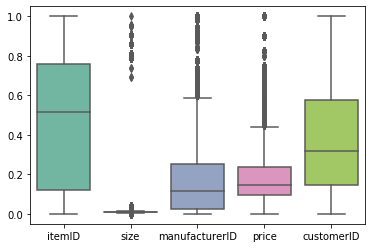

In [33]:
import seaborn as sns 
sns.boxplot(data=X.iloc[:,0:5], orient="v", palette="Set2")

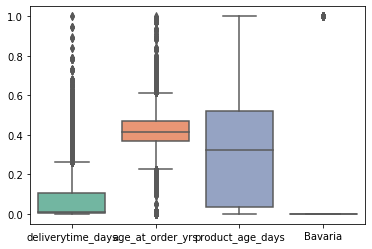

In [34]:
sns.boxplot(data=X.iloc[:,5:9], orient="v", palette="Set2")

In [35]:
# Splitting the data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)  #random_state=0
print(Y_train.value_counts())
print(Y_test.value_counts())

#create report dataframe
report = pd.DataFrame(columns=['Model','Mean Acc. Training','Standard Deviation','Acc. Test'])

0    102053
1    101929
Name: returnShipment, dtype: int64
1    25560
0    25436
Name: returnShipment, dtype: int64


# MODELLING

In [40]:
#######################
# Logistic Regression #
#######################
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lrmodel, X_train, Y_train, scoring='accuracy', cv = 10)
print("Accuracies = ", accuracies)
print("Mean = ", accuracies.mean())
print("SD = ", accuracies.std())
lrmodel.fit(X_train, Y_train)
Y_test_pred = lrmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Logistic Regression', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))


Accuracies =  [0.56321388 0.56566498 0.56399824 0.56880239 0.56483161 0.56801804
 0.57572192 0.56822082 0.56449478 0.56748541]
Mean =  0.5670452073428094
SD =  0.0034375585557530714
Model                 Logistic Regression
Mean Acc. Training               0.567045
Standard Deviation             0.00343756
Acc. Test                        0.565848
Name: 0, dtype: object
Confusion Matrix Testing:
 [[15551  9942]
 [12198 13305]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.58     25493
           1       0.57      0.52      0.55     25503

    accuracy                           0.57     50996
   macro avg       0.57      0.57      0.57     50996
weighted avg       0.57      0.57      0.57     50996



In [35]:
###############
# Naive Bayes #
###############

from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(nbmodel, X_train, Y_train, scoring='accuracy', cv = 10)
print("Accuracies = ", accuracies)
nbmodel.fit(X_train, Y_train)
Y_test_pred = nbmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Naive Bayes', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))


Accuracies =  [0.52085887 0.52076082 0.51326045 0.52103147 0.52014903 0.51970781
 0.51642318 0.51951172 0.51897245 0.51806638]
Model                 Naive Bayes
Mean Acc. Training       0.518874
Standard Deviation     0.00230353
Acc. Test                0.519198
Name: 0, dtype: object
Confusion Matrix Testing:
 [[ 5785 19785]
 [ 4734 20692]]
              precision    recall  f1-score   support

           0       0.55      0.23      0.32     25570
           1       0.51      0.81      0.63     25426

    accuracy                           0.52     50996
   macro avg       0.53      0.52      0.47     50996
weighted avg       0.53      0.52      0.47     50996



In [82]:
#################
# Random Forest #
#################
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [ 4.,  5.,  6.,  7.,  8.],
    'n_estimators': [ 10,  50,  100, 150, 200]
}
CV_rfmodel = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=10)
CV_rfmodel.fit(X_train, Y_train)
print(CV_rfmodel.best_params_)
#use the best parameters
rfmodel = rfmodel.set_params(**CV_rfmodel.best_params_)
rfmodel.fit(X_train, Y_train)
Y_test_pred = rfmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Random Forest (grid)', 
                          CV_rfmodel.cv_results_['mean_test_score'][CV_rfmodel.best_index_], 
                          CV_rfmodel.cv_results_['std_test_score'][CV_rfmodel.best_index_], accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

{'max_depth': 8.0, 'n_estimators': 200}
Model                 Random Forest (grid)
Mean Acc. Training                0.583409
Standard Deviation              0.00226173
Acc. Test                         0.582203
Name: 2, dtype: object
Confusion Matrix Testing:
 [[10676 14661]
 [ 6645 19014]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50     25337
           1       0.56      0.74      0.64     25659

    accuracy                           0.58     50996
   macro avg       0.59      0.58      0.57     50996
weighted avg       0.59      0.58      0.57     50996



In [83]:
# Random Forest with changed hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [ 8.,9.,10.],
    'n_estimators': [200,220,240]
}
CV_rfmodel = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=10)
CV_rfmodel.fit(X_train, Y_train)
print(CV_rfmodel.best_params_)
#use the best parameters
rfmodel = rfmodel.set_params(**CV_rfmodel.best_params_)
rfmodel.fit(X_train, Y_train)
Y_test_pred = rfmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Random Forest (grid)', 
                          CV_rfmodel.cv_results_['mean_test_score'][CV_rfmodel.best_index_], 
                          CV_rfmodel.cv_results_['std_test_score'][CV_rfmodel.best_index_], accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

{'max_depth': 10.0, 'n_estimators': 200}
Model                 Random Forest (grid)
Mean Acc. Training                0.587469
Standard Deviation              0.00201622
Acc. Test                         0.584791
Name: 3, dtype: object
Confusion Matrix Testing:
 [[11060 14277]
 [ 6897 18762]]
              precision    recall  f1-score   support

           0       0.62      0.44      0.51     25337
           1       0.57      0.73      0.64     25659

    accuracy                           0.58     50996
   macro avg       0.59      0.58      0.58     50996
weighted avg       0.59      0.58      0.58     50996



In [36]:
# Random Forest with changed hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [ 11.,12.,13.],
    'n_estimators': [200,220,240]
}
CV_rfmodel = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=10)
CV_rfmodel.fit(X_train, Y_train)
print(CV_rfmodel.best_params_)
#use the best parameters
rfmodel = rfmodel.set_params(**CV_rfmodel.best_params_)
rfmodel.fit(X_train, Y_train)
Y_test_pred = rfmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Random Forest (grid)', 
                          CV_rfmodel.cv_results_['mean_test_score'][CV_rfmodel.best_index_], 
                          CV_rfmodel.cv_results_['std_test_score'][CV_rfmodel.best_index_], accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

{'max_depth': 13.0, 'n_estimators': 240}
Model                 Random Forest (grid)
Mean Acc. Training                0.593293
Standard Deviation              0.00387035
Acc. Test                         0.594949
Name: 0, dtype: object
Confusion Matrix Testing:
 [[11808 13628]
 [ 7028 18532]]
              precision    recall  f1-score   support

           0       0.63      0.46      0.53     25436
           1       0.58      0.73      0.64     25560

    accuracy                           0.59     50996
   macro avg       0.60      0.59      0.59     50996
weighted avg       0.60      0.59      0.59     50996



In [42]:
################
#     KNN      #
################
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(knnmodel, X_train, Y_train, scoring='accuracy', cv=10)
knnmodel.fit(X_train, Y_train)
Y_test_pred = knnmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['k-NN', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])

Model                       k-NN
Mean Acc. Training      0.536484
Standard Deviation    0.00370589
Acc. Test               0.536611
Name: 5, dtype: object


In [36]:
######################
#   Decision Trees   #
######################
from sklearn.tree import DecisionTreeClassifier
etmodel = DecisionTreeClassifier(criterion='entropy', random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [ 11.,12.,13.,14.,15.,16.,17.]
}
CV_etmodel = GridSearchCV(estimator=etmodel, param_grid=param_grid, cv=10)
CV_etmodel.fit(X_train, Y_train)
print(CV_etmodel.best_params_)
#use the best parameters
etmodel = etmodel.set_params(**CV_etmodel.best_params_)
etmodel.fit(X_train, Y_train)
Y_test_pred = etmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Decision Tree (grid)', 
                          CV_etmodel.cv_results_['mean_test_score'][CV_etmodel.best_index_], 
                          CV_etmodel.cv_results_['std_test_score'][CV_etmodel.best_index_], accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))






{'max_depth': 11.0}
Model                 Decision Tree (grid)
Mean Acc. Training                0.581365
Standard Deviation              0.00143814
Acc. Test                         0.582693
Name: 1, dtype: object
Confusion Matrix Testing:
 [[13364 12206]
 [ 9075 16351]]
              precision    recall  f1-score   support

           0       0.60      0.52      0.56     25570
           1       0.57      0.64      0.61     25426

    accuracy                           0.58     50996
   macro avg       0.58      0.58      0.58     50996
weighted avg       0.58      0.58      0.58     50996



{'max_depth': 12.0}
Model                 Decision Tree (grid)
Mean Acc. Training                 0.58112
Standard Deviation              0.00273347
Acc. Test                         0.581006
Name: 9, dtype: object
Confusion Matrix Testing:
 [[13175 12162]
 [ 9205 16454]]
              precision    recall  f1-score   support

           0       0.59      0.52      0.55     25337
           1       0.57      0.64      0.61     25659

    accuracy                           0.58     50996
   macro avg       0.58      0.58      0.58     50996
weighted avg       0.58      0.58      0.58     50996



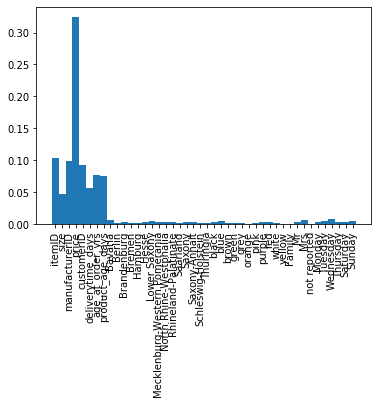

In [89]:
#     Gini      #
from sklearn.tree import DecisionTreeClassifier
etmodel = DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [11.,12.,13.]
}
CV_etmodel = GridSearchCV(estimator=etmodel, param_grid=param_grid, cv=10)
CV_etmodel.fit(X_train, Y_train)
print(CV_etmodel.best_params_)
#use the best parameters
etmodel = etmodel.set_params(**CV_etmodel.best_params_)
etmodel.fit(X_train, Y_train)
Y_test_pred = etmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Decision Tree (grid)', 
                          CV_etmodel.cv_results_['mean_test_score'][CV_etmodel.best_index_], 
                          CV_etmodel.cv_results_['std_test_score'][CV_etmodel.best_index_], accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

#show feature importance
list(zip(X, etmodel.feature_importances_))
index = np.arange(len(etmodel.feature_importances_))
bar_width = 1.0
plt.bar(index, etmodel.feature_importances_, bar_width)
plt.xticks(index,  list(X), rotation=90) # labels get centered
plt.show()

In [84]:
#########################
# Discriminant Analysis #
#########################

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
dismodel = LinearDiscriminantAnalysis()
dismodel.fit(X_train, Y_train)
accuracies = cross_val_score(dismodel, X_train, Y_train, scoring='accuracy', cv = 10)
print("Accuracies = ", accuracies)
dismodel.fit(X_train, Y_train)
Y_test_pred = dismodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Linear Discriminant Analysis', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #why
qdismodel = QuadraticDiscriminantAnalysis()
qdismodel.fit(X_train, Y_train)
accuracies = cross_val_score(qdismodel, X_train, Y_train, scoring='accuracy', cv = 10)
print("Accuracies = ", accuracies)
qdismodel.fit(X_train, Y_train)
Y_test_pred = qdismodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Quadratic Discriminant Analysis', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

Accuracies =  [0.56561596 0.56473357 0.57338955 0.56574174 0.56745759 0.57044808
 0.56093735 0.56598686 0.56834003 0.56652613]
Model                 Linear Discriminant Analysis
Mean Acc. Training                        0.566918
Standard Deviation                      0.00318269
Acc. Test                                 0.564652
Name: 4, dtype: object
Confusion Matrix Testing:
 [[15807  9530]
 [12671 12988]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59     25337
           1       0.58      0.51      0.54     25659

    accuracy                           0.56     50996
   macro avg       0.57      0.57      0.56     50996
weighted avg       0.57      0.56      0.56     50996

Accuracies =  [0.51600569 0.53046718 0.5249044  0.52666928 0.53166977 0.52804196
 0.52715953 0.53804295 0.53039514 0.53431709]
Model                 Quadratic Discriminant Analysis
Mean Acc. Training                           0.528767
Standard Deviation        

In [0]:
################################
# Gradient Boosting Classifier #
################################

from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_depth': [ 11., 12., 13.],
    'subsample': [0.7, 0.8, 0.9],
    'n_estimators': [200, 220,230],
    'learning_rate': [0.1, 0.2, 0.3]
}
CV_gbmodel = GridSearchCV(estimator=gbmodel, param_grid=param_grid, cv=10)
CV_gbmodel.fit(X_train, Y_train)
print(CV_gbmodel.best_params_)
#use the best parameters
gbmodel = gbmodel.set_params(**CV_gbmodel.best_params_)
gbmodel.fit(X_train, Y_train)
Y_test_pred = gbmodel.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Gradient Boosting (grid)', 
                          CV_gbmodel.cv_results_['mean_test_score'][CV_gbmodel.best_index_], 
                          CV_gbmodel.cv_results_['std_test_score'][CV_gbmodel.best_index_], accte]
print(report.loc[len(report)-1])
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

Confusion Matrix Training:
 [[49908 52145]
 [31363 70566]]
Accurray Training: 0.5906109362590817
Confusion Matrix Testing:
 [[12326 13110]
 [ 7899 17661]]
Accurray Test: 0.5880265118832849


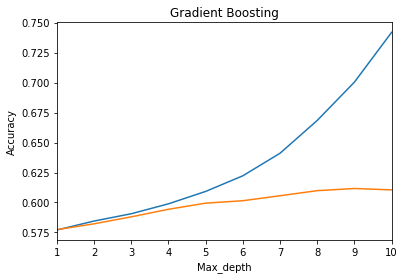

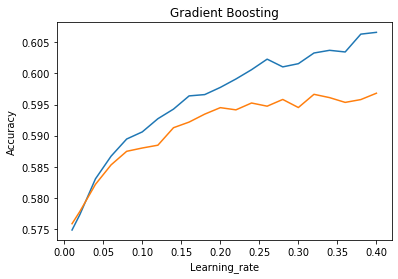

KeyboardInterrupt: ignored

In [37]:
# Gradient Boosting without Cross Validation
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0)
gbmodel.fit(X_train, Y_train)
Y_train_pred = gbmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)
acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)
Y_test_pred = gbmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)
accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

#varying max_depth
accuracies = np.zeros((2,10), float)
for k in range(0, 10):
    gbmodel = GradientBoostingClassifier(random_state=0, max_depth=k+1)
    gbmodel.fit(X_train, Y_train)
    Y_train_pred = gbmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[0,k] = acctr
    Y_test_pred = gbmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[1,k] = accte
plt.plot(range(1, 11), accuracies[0,:])
plt.plot(range(1, 11), accuracies[1,:])
plt.xlim(1,10)
plt.xticks(range(1, 11))
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting')
plt.show()

#varying learning_rate
accuracies = np.zeros((3,21), float)
lr = np.linspace(0, 0.4, 21)
lr[0] = 0.01
for k in range(0, 21):
    gbmodel = GradientBoostingClassifier(random_state=0, learning_rate=lr[k])
    gbmodel.fit(X_train, Y_train)
    Y_train_pred = gbmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[1,k] = acctr
    Y_test_pred = gbmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[2,k] = accte
    accuracies[0,k] = lr[k]
plt.plot(lr, accuracies[1,:])
plt.plot(lr, accuracies[2,:])
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting')
plt.show()

#varying max_depth and learning_rate
accuracies = np.zeros((4,21*10), float)
lr = np.linspace(0, 0.4, 21)
lr[0] = 0.01
row = 0
for k in range(0, 10):
    for l in range(0, 21):
        gbmodel = GradientBoostingClassifier(random_state=0, max_depth=k+1, learning_rate=lr[l])
        gbmodel.fit(X_train, Y_train)
        Y_train_pred = gbmodel.predict(X_train)
        acctr = accuracy_score(Y_train, Y_train_pred)
        accuracies[2,row] = acctr
        Y_test_pred = gbmodel.predict(X_test)
        accte = accuracy_score(Y_test, Y_test_pred)
        accuracies[3,row] = accte
        accuracies[0,row] = k+1
        accuracies[1,row] = lr[l]
        row = row + 1

from tabulate import tabulate
headers = ["Max_depth", "Learning_rate", "acctr", "accte"]
table = tabulate(accuracies.transpose(), headers, tablefmt="plain", floatfmt=".3f")
print("\n",table)

maxi = np.array(np.where(accuracies==accuracies[3].max()))
print(maxi[1,:])
print(accuracies[:,maxi[1,:]])
table = tabulate(accuracies[:,maxi[1,:]].transpose(), headers, tablefmt="plain", floatfmt=".3f")
print("\n",table)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = accuracies[0,:]
y = accuracies[1,:]
z = accuracies[3,:]
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
ax.set_xlabel('Max_depth')
ax.set_ylabel('Learning_rate')
ax.set_zlabel('accte')
plt.show()

from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(random_state=0, max_depth=4, learning_rate=0.2)
gbmodel.fit(X_train, Y_train)
Y_train_pred = gbmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)
acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)
Y_test_pred = gbmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)
accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)
report.loc[len(report)] = ['Gradient Boosting', acctr, accte]

Confusion Matrix Training:
 [[48329 53780]
 [32055 69818]]
Accurray Training: 0.5792030669372787
Confusion Matrix Testing:
 [[11945 13435]
 [ 8253 17363]]
Accurray Test: 0.5747117420974194


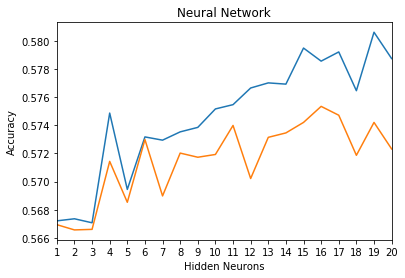


   Hidden Neurons    acctr    accte
           1.000    0.567    0.567
           2.000    0.567    0.567
           3.000    0.567    0.567
           4.000    0.575    0.571
           5.000    0.569    0.569
           6.000    0.573    0.573
           7.000    0.573    0.569
           8.000    0.574    0.572
           9.000    0.574    0.572
          10.000    0.575    0.572
          11.000    0.575    0.574
          12.000    0.577    0.570
          13.000    0.577    0.573
          14.000    0.577    0.573
          15.000    0.579    0.574
          16.000    0.579    0.575
          17.000    0.579    0.575
          18.000    0.576    0.572
          19.000    0.581    0.574
          20.000    0.579    0.572

   Hidden Neurons    acctr    accte
          16.000    0.579    0.575
Confusion Matrix Training:
 [[46041 56068]
 [31044 70829]]
Accurray Training: 0.5729427106313302
Confusion Matrix Testing:
 [[11342 14038]
 [ 7942 17674]]
Accurray Test: 0.5689858028080633


ValueError: ignored

In [39]:
##################
# Neural Network #
##################

from sklearn.neural_network import MLPClassifier
nnetmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(17,), random_state=0)
nnetmodel.fit(X_train, Y_train)
Y_train_pred = nnetmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)
acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)
Y_test_pred = nnetmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)
accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)

accuracies = np.zeros((3,20), float)
for k in range(0, 20):
    nnetmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(k+1,), random_state=0)
    nnetmodel.fit(X_train, Y_train)
    Y_train_pred = nnetmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[1,k] = acctr
    Y_test_pred = nnetmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[2,k] = accte
    accuracies[0,k] = k+1
plt.plot(range(1, 21), accuracies[1,:])
plt.plot(range(1, 21), accuracies[2,:])
plt.xlim(1,20)
plt.xticks(range(1, 21))
plt.xlabel('Hidden Neurons')
plt.ylabel('Accuracy')
plt.title('Neural Network')
plt.show()

from tabulate import tabulate
headers = ["Hidden Neurons", "acctr", "accte"]
table = tabulate(accuracies.transpose(), headers, tablefmt="plain", floatfmt=".3f")
print("\n",table)
maxi = np.array(np.where(accuracies==accuracies[2:].max()))
table = tabulate(accuracies[:,maxi[1,:]].transpose(), headers, tablefmt="plain", floatfmt=".3f")
print("\n",table)

nnetmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,), random_state=0)
nnetmodel.fit(X_train, Y_train)
Y_train_pred = nnetmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)
acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)
Y_test_pred = nnetmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)
accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)
report.loc[len(report)] = ['Neural Network', acctr, accte]
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

In [37]:
###################################
# Comparing with Voting Ensembles #
###################################

from mlxtend.classifier import EnsembleVoteClassifier
ens1model = EnsembleVoteClassifier(clfs=[etmodel, nbmodel], weights=[1,1])
accuracies = cross_val_score(ens1model, X_train, Y_train, scoring='accuracy', cv=5)
ens1model.fit(X_train, Y_train)
Y_test_pred = ens1model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ensemble (equal, hard)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

print('Comparison with Ensemble (weighting):')
ens2model = EnsembleVoteClassifier(clfs=[etmodel, nbmodel], weights=[1,2])
accuracies = cross_val_score(ens2model, X_train, Y_train, scoring='accuracy', cv=5)
ens2model.fit(X_train, Y_train)
Y_test_pred = ens2model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ens. (weighted, hard)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))

print('Comparison with Ensemble (Soft Voting):')
ens3model = EnsembleVoteClassifier(clfs=[etmodel, nbmodel], weights=[1,2], voting='soft')
accuracies = cross_val_score(ens3model, X_train, Y_train, scoring='accuracy', cv=5)
ens3model.fit(X_train, Y_train)
Y_test_pred = ens3model.predict(X_test)
accte = accuracy_score(Y_test, Y_test_pred)
report.loc[len(report)] = ['Ens. (weighted, soft)', accuracies.mean(), accuracies.std(), accte]
print(report.loc[len(report)-1])
cmte = confusion_matrix(Y_test, Y_test_pred) 
print("Confusion Matrix Testing:\n", cmte) 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_pred))
    



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Model                 Ensemble (equal, hard)
Mean Acc. Training                  0.572168
Standard Deviation                0.00269147
Acc. Test                           0.573927
Name: 2, dtype: object
Confusion Matrix Testing:
 [[15351 10219]
 [11509 13917]]
              precision    recall  f1-score   support

           0       0.57      0.60      0.59     25570
           1       0.58      0.55      0.56     25426

    accuracy                           0.57     50996
   macro avg       0.57      0.57      0.57     50996
weighted avg       0.57      0.57      0.57     50996

Comparison with Ensemble (weighting):
Model                 Ens. (weighted, hard)
Mean Acc. Training                 0.518796
Standard Deviation               0.00245622
Acc. Test                          0.519198
Name: 3, dtype: object
Confusion Matrix Testing:
 [[ 5785 19785]
 [ 4734 20692]]
              precision    recall  f1-score   support

           0       0.55      0.23      0.32     25570
        

In [0]:
##########################
# Support Vector Machine #
###########################

#linear kernel
from sklearn.svm import SVC
LinSVCmodel = SVC(kernel='linear', C=10, random_state=0)
LinSVCmodel.fit(X_train, Y_train)
Y_train_pred = LinSVCmodel.predict(X_train)
cmtr = confusion_matrix(Y_train, Y_train_pred)
print("Confusion Matrix Training:\n", cmtr)
acctr = accuracy_score(Y_train, Y_train_pred)
print("Accurray Training:", acctr)
Y_test_pred = LinSVCmodel.predict(X_test)
cmte = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix Testing:\n", cmte)
accte = accuracy_score(Y_test, Y_test_pred)
print("Accurray Test:", accte)
report.loc[len(report)] = ['SVM (Linear)', acctr, accte]

accuracies = np.zeros((3,21), float)
costs = np.linspace(0, 40, 21)
costs[0] = 0.5
for k in range(0, 21):
    LinSVCmodel = SVC(kernel='linear', C=costs[k], random_state=0)
    LinSVCmodel.fit(X_train, Y_train)
    Y_train_pred = LinSVCmodel.predict(X_train)
    acctr = accuracy_score(Y_train, Y_train_pred)
    accuracies[1,k] = acctr
    Y_test_pred = LinSVCmodel.predict(X_test)
    accte = accuracy_score(Y_test, Y_test_pred)
    accuracies[2,k] = accte
    accuracies[0,k] = costs[k]
plt.plot(costs, accuracies[1,:])
plt.plot(costs, accuracies[2,:])
plt.xlim(1,20)
plt.xticks(costs, rotation=90)
plt.xlabel('Cost')
plt.ylabel('Accuracy')
plt.title('Linear SVM')
plt.show()

from tabulate import tabulate
headers = ["Cost", "acctr", "accte"]
table = tabulate(accuracies.transpose(), headers, tablefmt="plain", floatfmt=".3f")
print("\n",table)



# price is the most significant feature that will influence whether the customer will return or not. Besides, Item ID, manufacturer ID, customer ID, age_at_order_yrs, product_age_days are also important. 

# if we combine with the significant features with our model, we can classified our customer on their behavior and predict the return probability